# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
     
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

            # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
                        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | mount pearl
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | brinkmann
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | takamaka
City not found. Skipping...
Processing Record 12 of Set 1 | vila do maio
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | khorixas
Processing Record 16 of Set 1 | mitsamiouli
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | oroqen zizhiqi
Processing Record 19 of Set 1 | nagqu
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | vorkuta
Processin

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,14.84,93,40,2.06,GB,1695828478
1,mount pearl,47.5166,-52.7813,10.74,77,100,4.63,CA,1695828891
2,rio grande,-32.0350,-52.0986,18.06,73,90,9.15,BR,1695828891
3,lorengau,-2.0226,147.2712,26.68,84,95,2.68,PG,1695828892
4,arraial do cabo,-22.9661,-42.0278,32.98,55,40,7.72,BR,1695828892


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,14.84,93,40,2.06,GB,1695828478
1,mount pearl,47.5166,-52.7813,10.74,77,100,4.63,CA,1695828891
2,rio grande,-32.0350,-52.0986,18.06,73,90,9.15,BR,1695828891
3,lorengau,-2.0226,147.2712,26.68,84,95,2.68,PG,1695828892
4,arraial do cabo,-22.9661,-42.0278,32.98,55,40,7.72,BR,1695828892


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

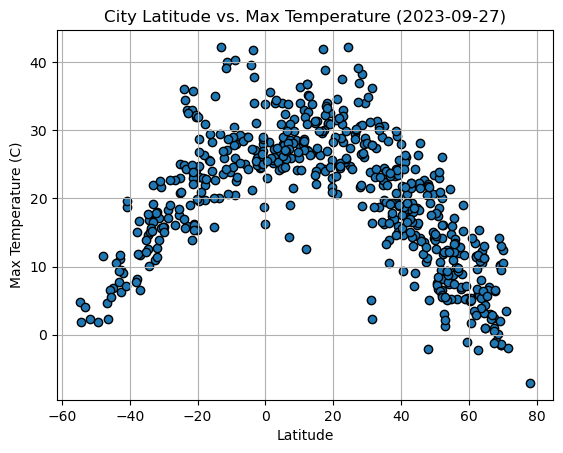

In [38]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-09-27)')
plt.grid('True')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

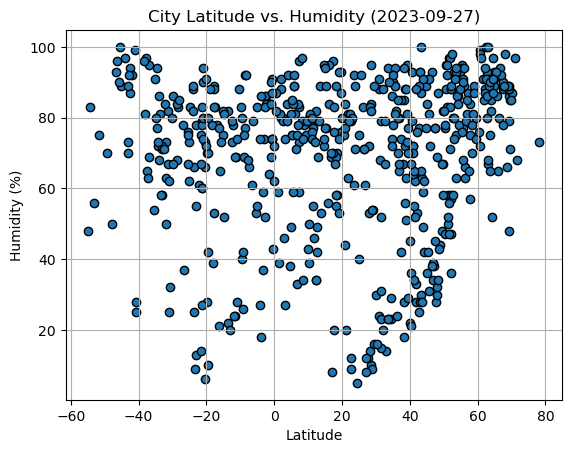

In [39]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-09-27)')
plt.grid('True')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

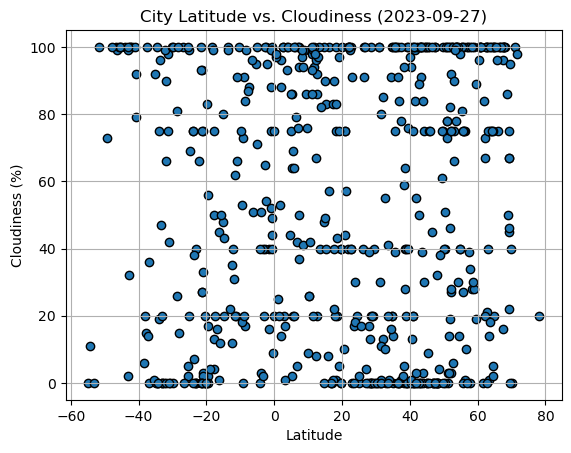

In [40]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-09-27)')
plt.grid('True')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

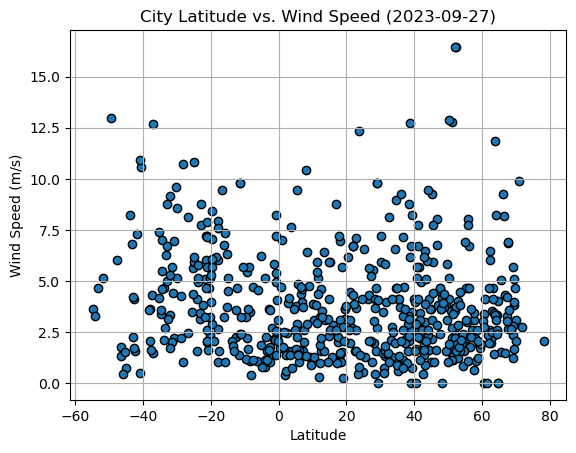

In [41]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-09-27)')
plt.grid('True')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def WeatherRegression(hemisphere, attribute):
    
    #Prepare and plot scatter plot
    x_values = hemisphere['Lat']
    y_values = hemisphere[attribute]
    plt.scatter(x_values,y_values)
    if attribute == "Max Temp":
        ylabel = "Max Temperature (C)"
    elif attribute == "Humidity":
        ylabel = "Humidity (%)"
    elif attribute == "Cloudiness":
        ylabel = "Cloudiness (%)"
    elif attribute == "Wind Speed":
        ylabel = "Wind Speed (m/s) "

    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f'City Latitude vs. {ylabel} (2023-09-27)')

    #Prepare and plot Linear Regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,xy=(min(x_values),min(y_values)),fontsize=15,color="red")
    
    #Print R Value
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,14.84,93,40,2.06,GB,1695828478
1,mount pearl,47.5166,-52.7813,10.74,77,100,4.63,CA,1695828891
5,fortuna,40.5982,-124.1573,14.64,93,100,2.68,US,1695828892
6,udachny,66.4167,112.4000,3.03,80,100,8.18,RU,1695828892
9,vila do maio,15.1333,-23.2167,31.44,77,83,5.91,CV,1695828892


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rio grande,-32.0350,-52.0986,18.06,73,90,9.15,BR,1695828891
3,lorengau,-2.0226,147.2712,26.68,84,95,2.68,PG,1695828892
4,arraial do cabo,-22.9661,-42.0278,32.98,55,40,7.72,BR,1695828892
7,brinkmann,-30.8659,-62.0374,21.66,32,0,2.19,AR,1695828892
8,bredasdorp,-34.5322,20.0403,14.64,77,0,5.49,ZA,1695828892


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6515132629637482


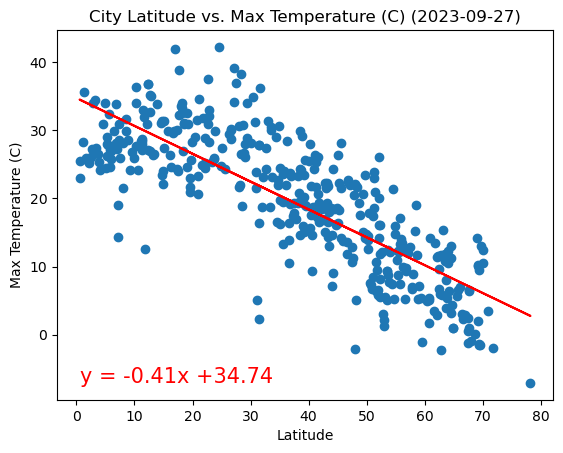

In [58]:
# Linear regression on Northern Hemisphere
WeatherRegression(northern_hemi_df, "Max Temp")

The r-value is: 0.5931429446047362


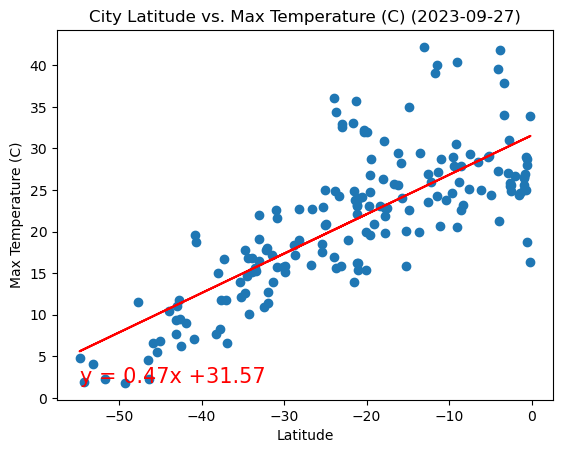

In [59]:
# Linear regression on Southern Hemisphere
WeatherRegression(southern_hemi_df, "Max Temp")

The above plots show a moderate correlation between latitude and temperature.<br>
The temperature is likely to increase as we get closer to the equator, but the above does not take into consideration the location's elevation (coast vs. mountain temperatures), and different timezones (day vs. night temperatures).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03477130708778554


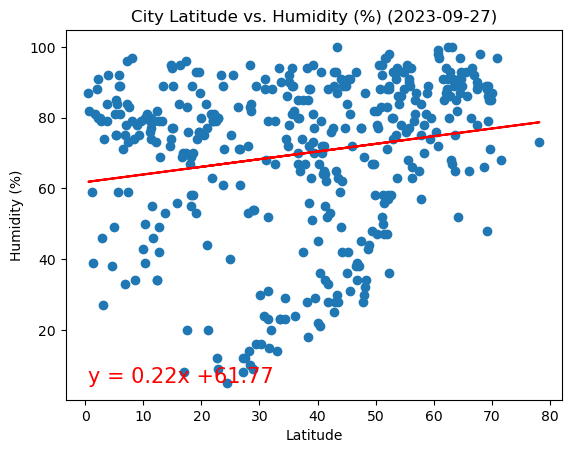

In [60]:
# Northern Hemisphere
WeatherRegression(northern_hemi_df, "Humidity")

The r-value is: 0.01690477480265367


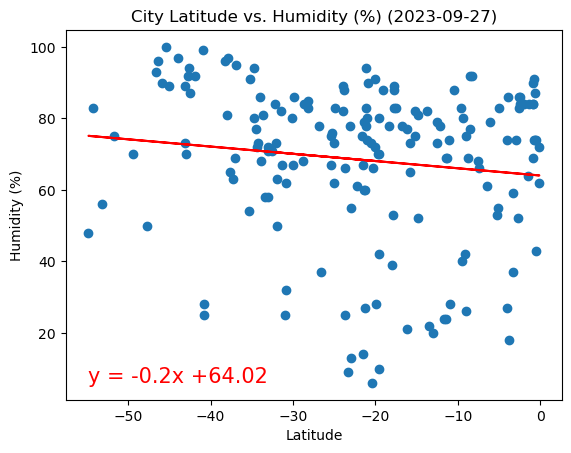

In [61]:
# Southern Hemisphere
WeatherRegression(southern_hemi_df, "Humidity")

The above plots show no correlation between latitude and humidity.<br>
Other factors like distance from bodies of water might be more relevant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.001351063219736684


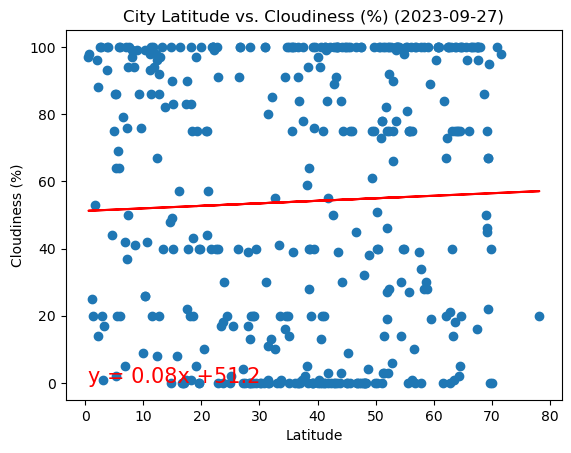

In [62]:
# Northern Hemisphere
WeatherRegression(northern_hemi_df, "Cloudiness")

The r-value is: 0.00041539497280815556


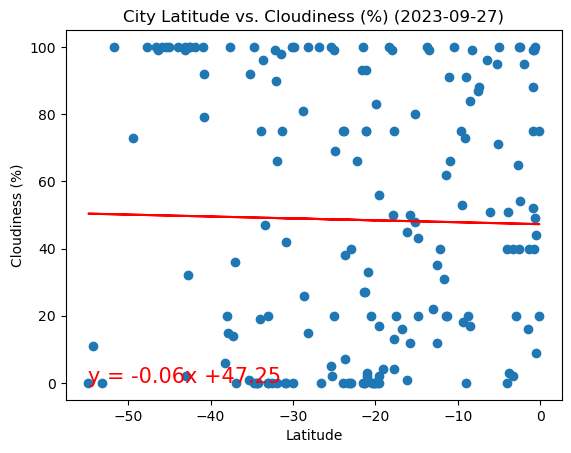

In [63]:
# Southern Hemisphere
WeatherRegression(southern_hemi_df, "Cloudiness")

The above plots show no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0034550516539951694


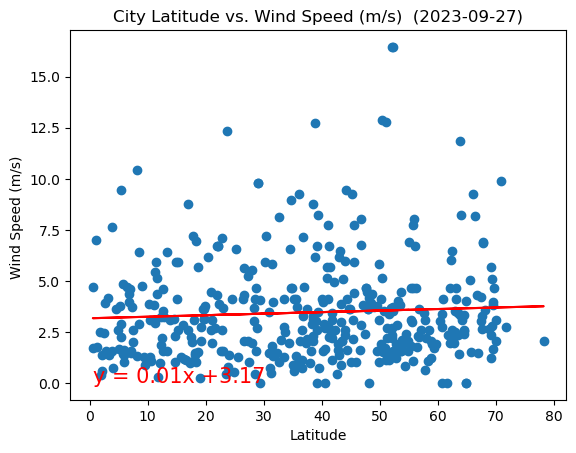

In [64]:
# Northern Hemisphere
WeatherRegression(northern_hemi_df, "Wind Speed")

The r-value is: 0.04209326135802567


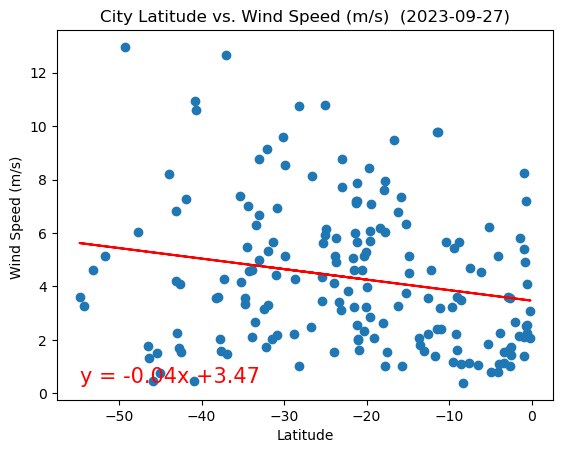

In [65]:
# Southern Hemisphere
WeatherRegression(southern_hemi_df, "Wind Speed")

The above plots show no correlation between latitude and wind speed.